Nama: Muhammad Fadzrin Madu

Email: aan.fadzrin@gmail.com

Phone: 087788424220

Kota: Kendari, Sulawesi Tenggara

In [83]:
# mengimport library yang dibutuhkan
import zipfile, os, shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, History

In [ ]:
# mendownload dataset rockpaperscissors
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O '/tmp/rockpaperscissors.zip'

--2021-05-16 06:02:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.03MB/s    in 4m 22s  

2021-05-16 06:06:25 (1.17 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# mengestrak file rockpaperscissors.zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# menghapus folder rps-cv-images dan file README_rpc-cv-images.txt
base_dir = '/tmp/rockpaperscissors'

if os.path.exists('rps-cv-images'):
    shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))

if os.path.exists('README_rpc-cv-images.txt'):
    os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

In [94]:
# membagi dataset menjadi train set dan validation set
base_dir = '/tmp/rockpaperscissors'

IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNELS = 100, 100, 3

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip= True,
    shear_range = 0.2,
    zoom_range=0.4,
    fill_mode = 'nearest',
    validation_split = 0.4
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [106]:
# membuat model Sequential
INPUT_SHAPE = (IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNELS)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 21, 21, 64)      

In [114]:
# compile model dengan 'RMSprop' optimizer loss function 'categorical_crossentropy' 
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = ['accuracy']
)

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
history = History()

# latih model
model.fit(
    train_generator,
    steps_per_epoch=32, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    callbacks=[earlystop, history],
    verbose=2
)

Epoch 1/20
32/32 - 17s - loss: 0.2262 - accuracy: 0.9346 - val_loss: 0.1750 - val_accuracy: 0.9500
Epoch 2/20
32/32 - 15s - loss: 0.1437 - accuracy: 0.9527 - val_loss: 0.2134 - val_accuracy: 0.9062
Epoch 3/20
32/32 - 15s - loss: 0.1887 - accuracy: 0.9385 - val_loss: 0.2159 - val_accuracy: 0.9187
Epoch 4/20
32/32 - 15s - loss: 0.1414 - accuracy: 0.9507 - val_loss: 0.1306 - val_accuracy: 0.9625
Epoch 5/20
32/32 - 15s - loss: 0.1333 - accuracy: 0.9547 - val_loss: 0.4436 - val_accuracy: 0.9125
Epoch 6/20
32/32 - 15s - loss: 0.1175 - accuracy: 0.9551 - val_loss: 0.2506 - val_accuracy: 0.9250
Epoch 7/20
32/32 - 15s - loss: 0.1489 - accuracy: 0.9434 - val_loss: 0.1286 - val_accuracy: 0.9438
Epoch 8/20
32/32 - 15s - loss: 0.1324 - accuracy: 0.9517 - val_loss: 0.0868 - val_accuracy: 0.9688
Epoch 9/20
32/32 - 15s - loss: 0.1192 - accuracy: 0.9628 - val_loss: 0.0676 - val_accuracy: 0.9812
Epoch 10/20
32/32 - 15s - loss: 0.1111 - accuracy: 0.9577 - val_loss: 0.1132 - val_accuracy: 0.9438
Epoch 11/

In [115]:
# mengecek tingkat akurasi model pada train set
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

42/42 [==============================] - 10s 230ms/step - loss: 0.0804 - accuracy: 0.9787
Loss: 0.0804
Accuracy: 0.9787


In [116]:
# mengecek tingkat akurasi model pada validation set
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

28/28 [==============================] - 7s 232ms/step - loss: 0.1047 - accuracy: 0.9691
Loss: 0.1047
Accuracy: 0.9691


Saving 1vvcitV1s17gKdbn.png to 1vvcitV1s17gKdbn.png


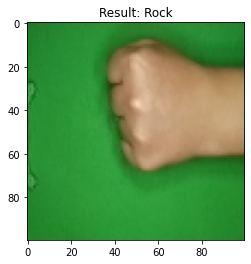

In [117]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(IMG_WIDTH,IMG_HEIGHT))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])

  resultProb = model.predict(images) 
  resultLabel = resultProb.argmax(axis=-1)

  # printing images based on class
  if resultLabel == 0:
    plt.title("Result: Paper")
  elif resultLabel == 1:
    plt.title("Result: Rock")
  elif resultLabel == 2:
    plt.title("Result: Scissor")